Data Wrangling II

Create an “Academic performance” dataset of students and perform the following operations using Python. 
1. Scan all variables for missing values and inconsistencies. If there are missing values and/or inconsistencies, use any of the suitable techniques to deal with them. 
2. Scan all numeric variables for outliers. If there are outliers, use any of the suitable techniques to deal with them. 
3. Apply data transformations on at least one of the variables. The purpose of this transformation should be one of the following reasons: to change the scale for better understanding of the variable, to convert a non-linear relation into a linear one, or to decrease the skewness and convert the distribution into a normal distribution. 
Reason and document your approach properly

In [210]:
print("hello world")

hello world


In [211]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [212]:
df =  pd.read_csv("StudentsPerformance_modified.csv")

In [213]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72.0,74.0
1,female,group C,some college,standard,completed,69,90.0,88.0
2,female,group B,master's degree,standard,none,90,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47,57.0,44.0
4,male,group C,some college,standard,none,76,78.0,75.0
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99.0,95.0
996,male,group C,high school,free/reduced,none,62,55.0,55.0
997,female,group C,high school,free/reduced,completed,59,71.0,65.0
998,female,group D,some college,standard,completed,68,78.0,77.0


In [214]:
print(dir(pd))

['ArrowDtype', 'BooleanDtype', 'Categorical', 'CategoricalDtype', 'CategoricalIndex', 'DataFrame', 'DateOffset', 'DatetimeIndex', 'DatetimeTZDtype', 'ExcelFile', 'ExcelWriter', 'Flags', 'Float32Dtype', 'Float64Dtype', 'Grouper', 'HDFStore', 'Index', 'IndexSlice', 'Int16Dtype', 'Int32Dtype', 'Int64Dtype', 'Int8Dtype', 'Interval', 'IntervalDtype', 'IntervalIndex', 'MultiIndex', 'NA', 'NaT', 'NamedAgg', 'Period', 'PeriodDtype', 'PeriodIndex', 'RangeIndex', 'Series', 'SparseDtype', 'StringDtype', 'Timedelta', 'TimedeltaIndex', 'Timestamp', 'UInt16Dtype', 'UInt32Dtype', 'UInt64Dtype', 'UInt8Dtype', '__all__', '__builtins__', '__cached__', '__doc__', '__docformat__', '__file__', '__git_version__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', '_built_with_meson', '_config', '_is_numpy_dev', '_libs', '_pandas_datetime_CAPI', '_pandas_parser_CAPI', '_testing', '_typing', '_version_meson', 'annotations', 'api', 'array', 'arrays', 'bdate_range', 'compat', 'conca

In [215]:
df.head(1000)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72.0,74.0
1,female,group C,some college,standard,completed,69,90.0,88.0
2,female,group B,master's degree,standard,none,90,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47,57.0,44.0
4,male,group C,some college,standard,none,76,78.0,75.0
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99.0,95.0
996,male,group C,high school,free/reduced,none,62,55.0,55.0
997,female,group C,high school,free/reduced,completed,59,71.0,65.0
998,female,group D,some college,standard,completed,68,78.0,77.0


In [216]:
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99.0,95.0
996,male,group C,high school,free/reduced,none,62,55.0,55.0
997,female,group C,high school,free/reduced,completed,59,71.0,65.0
998,female,group D,some college,standard,completed,68,78.0,77.0
999,female,group D,some college,free/reduced,none,77,86.0,86.0


In [217]:
#data prerocessing
df.describe()

,reading score,writing score
count,994.000000,991.000000
mean,68.008048,69.487386
std,16.602270,29.563757
min,3.000000,10.000000
25%,58.000000,57.000000
50%,69.500000,69.000000
75%,79.000000,79.000000
max,100.000000,567.000000


In [218]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      1000 non-null   object 
 5   math score                   992 non-null    object 
 6   reading score                994 non-null    float64
 7   writing score                991 non-null    float64
dtypes: float64(2), object(6)
memory usage: 62.6+ KB


In [219]:
df.isnull()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False


In [220]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     8
reading score                  6
writing score                  9
dtype: int64

In [221]:
gender_mapping = {'male':0,'female':1}

df['gender'] = df['gender'].map(gender_mapping)

df['gender'] = df['gender'].astype(int)

df.head()



,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,1,group B,bachelor's degree,standard,none,72,72.0,74.0
1,1,group C,some college,standard,completed,69,90.0,88.0
2,1,group B,master's degree,standard,none,90,95.0,93.0
3,0,group A,associate's degree,free/reduced,none,47,57.0,44.0
4,0,group C,some college,standard,none,76,78.0,75.0


In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   int32  
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      1000 non-null   object 
 5   math score                   992 non-null    object 
 6   reading score                994 non-null    float64
 7   writing score                991 non-null    float64
dtypes: float64(2), int32(1), object(5)
memory usage: 58.7+ KB


In [223]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     8
reading score                  6
writing score                  9
dtype: int64

In [224]:
df.shape

(1000, 8)

In [225]:
print(df.to_string())
x = df["reading score"].mean()
print(x)

     gender race/ethnicity parental level of education         lunch test preparation course math score  reading score  writing score
0         1        group B           bachelor's degree      standard                    none         72           72.0           74.0
1         1        group C                some college      standard               completed         69           90.0           88.0
2         1        group B             master's degree      standard                    none         90           95.0           93.0
3         0        group A          associate's degree  free/reduced                    none         47           57.0           44.0
4         0        group C                some college      standard                    none         76           78.0           75.0
5         1        group B          associate's degree      standard                    none         71           83.0           78.0
6         1        group B                some college      st

In [226]:
#replace '?' with nan
df['math score'] = df['math score'].replace('?', float('nan'))

# Convert 'math score' column to float
df['math score'] = df['math score'].astype(float)

In [227]:
df.dtypes

gender                           int32
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                     float64
reading score                  float64
writing score                  float64
dtype: object

In [228]:
#5.1 noramlization
df.isnull().sum()


gender                          0
race/ethnicity                  0
parental level of education     0
lunch                           0
test preparation course         0
math score                     43
reading score                   6
writing score                   9
dtype: int64

In [229]:
#5.2
mean_score = df['math score'].mean(skipna=True)
df['math score'].fillna(mean_score,inplace = True)
df['math score'].isnull().sum()

C:\Users\Adesh Mandhare\AppData\Local\Temp\ipykernel_12356\2935211965.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['math score'].fillna(mean_score,inplace = True)


0

In [230]:
#5.3
mean_score = df['reading score'].mean(skipna=True)
df['reading score'].fillna(mean_score,inplace=True)
df['reading score'].isnull().sum()

C:\Users\Adesh Mandhare\AppData\Local\Temp\ipykernel_12356\648853948.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['reading score'].fillna(mean_score,inplace=True)


0

In [231]:
#5.3
mean_score = df['writing score'].mean(skipna=True)
df['writing score'].fillna(mean_score,inplace=True)
df['writing score'].isnull().sum()

C:\Users\Adesh Mandhare\AppData\Local\Temp\ipykernel_12356\3954012542.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['writing score'].fillna(mean_score,inplace=True)


0

In [232]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [233]:
df.head(100)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,1,group B,bachelor's degree,standard,none,72.0,72.0,74.0
1,1,group C,some college,standard,completed,69.0,90.0,88.0
2,1,group B,master's degree,standard,none,90.0,95.0,93.0
3,0,group A,associate's degree,free/reduced,none,47.0,57.0,44.0
4,0,group C,some college,standard,none,76.0,78.0,75.0
...,...,...,...,...,...,...,...,...
95,0,group C,associate's degree,free/reduced,completed,78.0,81.0,82.0
96,0,group B,some high school,standard,completed,65.0,66.0,62.0
97,1,group E,some college,standard,completed,63.0,72.0,70.0
98,1,group D,some college,free/reduced,none,58.0,67.0,62.0


In [234]:
#6.1 Forming categories in Type column
df['test preparation course'] = df['test preparation course'].astype('category')
df.dtypes

gender                            int32
race/ethnicity                   object
parental level of education      object
lunch                            object
test preparation course        category
math score                      float64
reading score                   float64
writing score                   float64
dtype: object

In [235]:
df['test preparation course']

0           none
1      completed
2           none
3           none
4           none
         ...    
995    completed
996         none
997    completed
998    completed
999         none
Name: test preparation course, Length: 1000, dtype: category
Categories (2, object): ['completed', 'none']

In [236]:
# from sklearn.preprocessing import LabelEncoder
# label_encoder = LabelEncoder()
# df['test preparation course'] = label_encoder.fit_transform(df['test preparation course'])
# df

In [237]:
df['test preparation course'].unique()

['none', 'completed']
Categories (2, object): ['completed', 'none']

In [238]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,1,group B,bachelor's degree,standard,none,72.0,72.0,74.0
1,1,group C,some college,standard,completed,69.0,90.0,88.0
2,1,group B,master's degree,standard,none,90.0,95.0,93.0
3,0,group A,associate's degree,free/reduced,none,47.0,57.0,44.0
4,0,group C,some college,standard,none,76.0,78.0,75.0


Text(0, 0.5, 'Frequency')

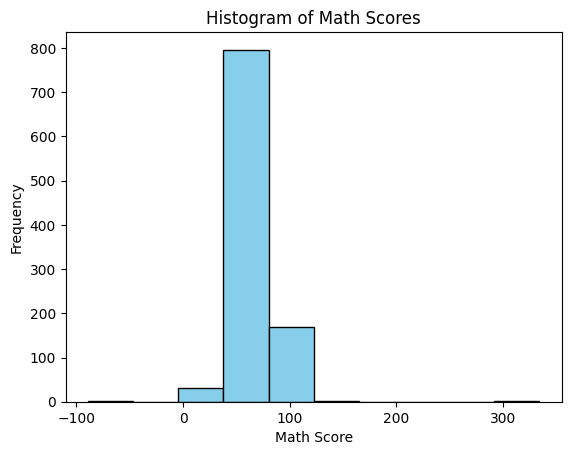

In [239]:
#optional

math_scores = df['math score'].dropna()
plt.hist(math_scores, bins=10, color='skyblue', edgecolor='black')  # Adjust the number of bins as needed
plt.title('Histogram of Math Scores')
plt.xlabel('Math Score')
plt.ylabel('Frequency')

<Axes: xlabel='math score', ylabel='reading score'>

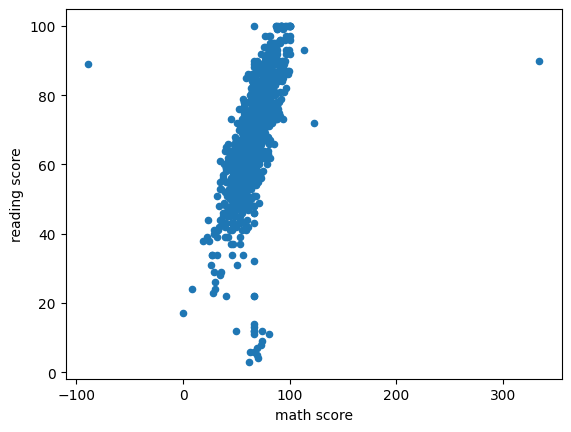

In [240]:
df.plot.scatter(x="math score",y='reading score')

<Axes: >

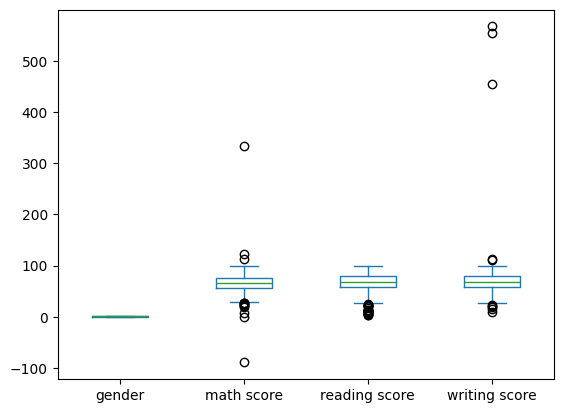

In [241]:
df.plot.box()

In [242]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,1,group B,bachelor's degree,standard,none,72.0,72.0,74.0
1,1,group C,some college,standard,completed,69.0,90.0,88.0
2,1,group B,master's degree,standard,none,90.0,95.0,93.0
3,0,group A,associate's degree,free/reduced,none,47.0,57.0,44.0
4,0,group C,some college,standard,none,76.0,78.0,75.0


In [243]:
print(f"the number of enteries in the dataset are {len(df)}")

the number of enteries in the dataset are 1000


In [244]:
def remove_outliers(dataframe,column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3-Q1
    lower_bound = Q1-1.5*IQR
    upper_bound = Q3 +1.5*IQR
    filter_df = dataframe[(dataframe[column]>=lower_bound) & (dataframe[column]<=upper_bound)]
    return filter_df

In [245]:
column =['math score','writing score','reading score']

for c in column:
   df = remove_outliers(df,c)
    
print(f"the number of enteries in the dataset are {len(df)}")

the number of enteries in the dataset are 959


<Axes: >

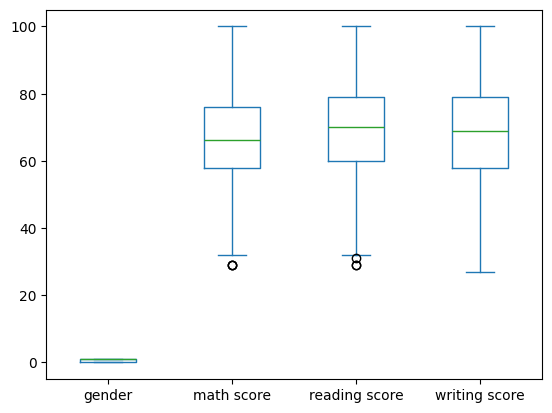

In [246]:
df.plot.box()

Text(0, 0.5, 'frequency')

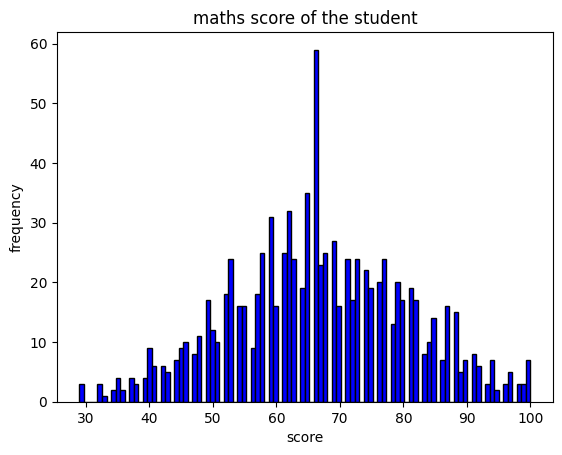

In [247]:
math_scores = df['math score'].dropna()
plt.hist(math_scores,bins =100,color ='blue',edgecolor = 'black')
plt.title("maths score of the student")
plt.xlabel('score')
plt.ylabel('frequency')

In [248]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Z-score normalization
scaler = StandardScaler()
df['math_score_zscore'] = scaler.fit_transform(df[['math score']].dropna())

# Min-Max normalization
min_max_scaler = MinMaxScaler()
df['math_score_minmax'] = min_max_scaler.fit_transform(df[['math score']].dropna())

df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,math_score_zscore,math_score_minmax
0,1,group B,bachelor's degree,standard,none,72.0,72.0,74.0,0.379778,0.605634
1,1,group C,some college,standard,completed,69.0,90.0,88.0,0.167054,0.563380
2,1,group B,master's degree,standard,none,90.0,95.0,93.0,1.656123,0.859155
3,0,group A,associate's degree,free/reduced,none,47.0,57.0,44.0,-1.392922,0.253521
4,0,group C,some college,standard,none,76.0,78.0,75.0,0.663410,0.661972


<Axes: >

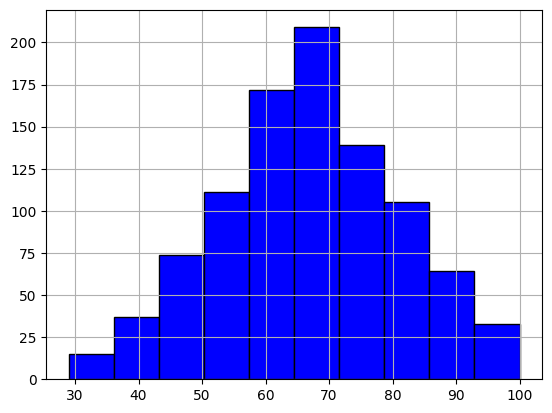

In [249]:
#optional
df['math score'].hist(bins =10,color ='blue',edgecolor = 'black')